<a href="https://colab.research.google.com/github/RFajardoMonzon/MachineLearningCourse/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 5 - Clasificación K-Nearest Neighbours


*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*
*   Recuerda que Google es tu amigo, y saber buscar la información en las documentaciones de las librerías es muy importante.
*   Una solución correcta no es la que funciona sino la que se entiende!
*   No dudes en preguntar cualquier duda al profesor que lleva todo el día dando la turra.

In [0]:
import numpy   as np
import scipy   as sc
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from scipy import stats

In [0]:
wine_data = load_wine()

X = wine_data.data
Y = wine_data.target

## 1. Visualizando KNN
---

**Tu tarea:** Implementa una función ***visualize_KNN($X_1$, $X_2$, $Y$, $k$, $dist$)*** que tome como parámetros de entrada dos variables de entrada $x1$ y $x2$ y el vector de etiquetas $Y$ , para que se encargue de visualizar un scatter plot donde se vean estas dos variable de entradas graficadas, indentificando por color el tipo de clase a la que pertence. Esta función deberá de utilizar los parámetros de entrada $k$ (número de valores a usar por KNN) y $dist$ (tipo de función que mide la distancia entre dos puntos) para realizar un KNN que prediga la clase para todas las combinaciones de puntos que se pueden generar en dicho scatter plot, para así poder sobreimpresionar un mapa de color que nos muestre la frontera de decisión del modelo. En la siguiente imagen puedes ver un ejemplo del resultado que se espera obtener:

![texto alternativo](http://www.mtechprojects.org/wp-content/uploads/2017/12/k-Nearest-Neighbor.png)

Una vez hayas implementado tu función, prueba a graficar diferentes variables, para diferentes valores de K y funciones de distancia.

1. ¿Cómo varía el comportamiento de las predicciones según variamos el valor de K?
2. ¿Cómo varía el comportamiento de las predicciones con diferente tipos de funciones de distancia?

**Pista:** Puede serte util para este ejercicio conocer las funciones ***np.meshgrid()*** y ***plt.pcolormesh()***.


In [0]:
def get_distance(p1, p2):
  return np.linalg.norm(p1 - p2)

In [0]:
def normalize(x):
  return (x - x.mean()) / x.std()

In [0]:
def normalize_2(x):
  return (x - x.min()) / (x.max() - x.min())

In [0]:
def KNN(entry_data, labeled, k):
  yp = []
  for point in entry_data:
    distances = []
    for labeled_point in labeled:     
      distances.append(get_distance(point, labeled_point))
    distances = np.c_[distances, Y]
    distances = distances.tolist()
    distances.sort(key=lambda x : x[0])
    nn = np.array(distances[:k])
#     print(i, nn)
    yp.append(stats.mode(nn[:, -1])[0])
  return np.array(yp)

In [0]:
def get_probable_y(labels):
  distribution = np.bincount(labels.astype(int))
  counter = 0
  relative_distribution = []
  for occurences in distribution:
    counter += occurences
    relative_distribution.append(counter)
    
  solution = np.random.randint(0, labels.size)  
  
  for i, v in enumerate(relative_distribution[:-1]):
    if v > solution:
      return i
    
  return len(relative_distribution) - 1

  

In [0]:
def get_y_probabilities(labels):
  distributions = np.bincount(labels.astype(int), minlength=3)
  return distributions / np.sum(distributions)

In [0]:
def prob_KNN(entry_data, labeled, k):
  yp = []
  for point in entry_data:
    distances = []
    for labeled_point in labeled:     
      distances.append(get_distance(point, labeled_point))
    distances = np.c_[distances, Y]
    distances = distances.tolist()
    distances.sort(key=lambda x : x[0])
    nn = np.array(distances[:k])
#     print(i, nn)
    yp.append(get_y_probabilities(nn[:, -1]))
  return np.array(yp)

In [0]:
def soft_KNN(entry_data, labeled, k):
  yp = []
  for point in entry_data:
    distances = []
    for labeled_point in labeled:     
      distances.append(get_distance(point, labeled_point))
    distances = np.c_[distances, Y]
    distances = distances.tolist()
    distances.sort(key=lambda x : x[0])
    nn = np.array(distances[:k])
#     print(i, nn)
    yp.append(get_probable_y(nn[:, -1]))
  return np.array(yp)

In [0]:
# TESTS
test = np.array([[1, 2], [2, 3], [3, 1], [4, 0]])
list_test = test.tolist()
list_test.sort(key=lambda x: x[1])
print(list_test)


[[4, 0], [3, 1], [1, 2], [2, 3]]


In [0]:
print(normalize(np.array([[1, 10, 20, 100, 200]])))

[[-0.86225284 -0.74323021 -0.61098284  0.44699611  1.76946979]]


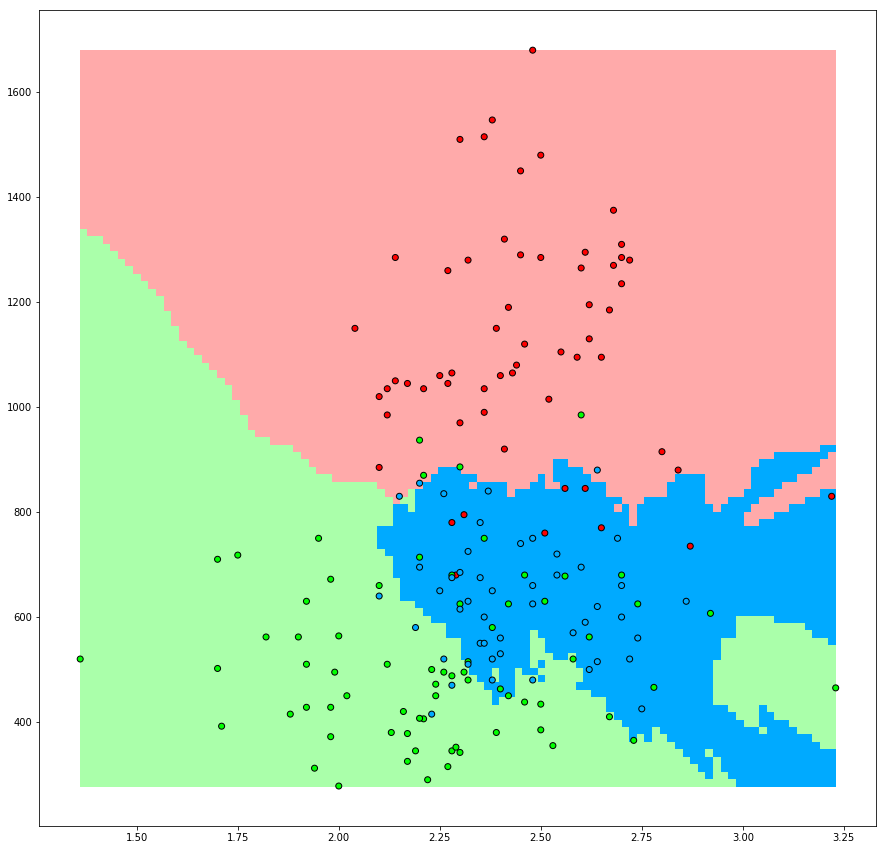

In [0]:
from matplotlib.colors import ListedColormap

def visualize_KNN(x0, x1, k):
  cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
  cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
  
  norm_x0 = normalize(x0)
  norm_x1 = normalize(x1)

  xx, yy = np.meshgrid(np.linspace(norm_x0.min(), norm_x0.max(), 100),
                       np.linspace(norm_x1.min(), norm_x1.max(), 100))

  norm_xx = xx.ravel()
  norm_yy = yy.ravel()
  

  yp = KNN(np.c_[norm_xx, norm_yy], np.c_[norm_x0, norm_x1], k)

#   print(yp)  

  plt.subplots(figsize=(15,15))

  yp = yp.reshape(xx.shape)
  
  xx, yy = np.meshgrid(np.linspace(x0.min(), x0.max(), 100),
                       np.linspace(x1.min(), x1.max(), 100))

  plt.pcolormesh(xx, yy, yp, cmap=cmap_light)


  plt.scatter(x0, x1, c=Y, cmap=cmap_bold, edgecolor="k")
  plt.show()
  
  
visualize_KNN(X[:, 2], X[:, 12], 15)

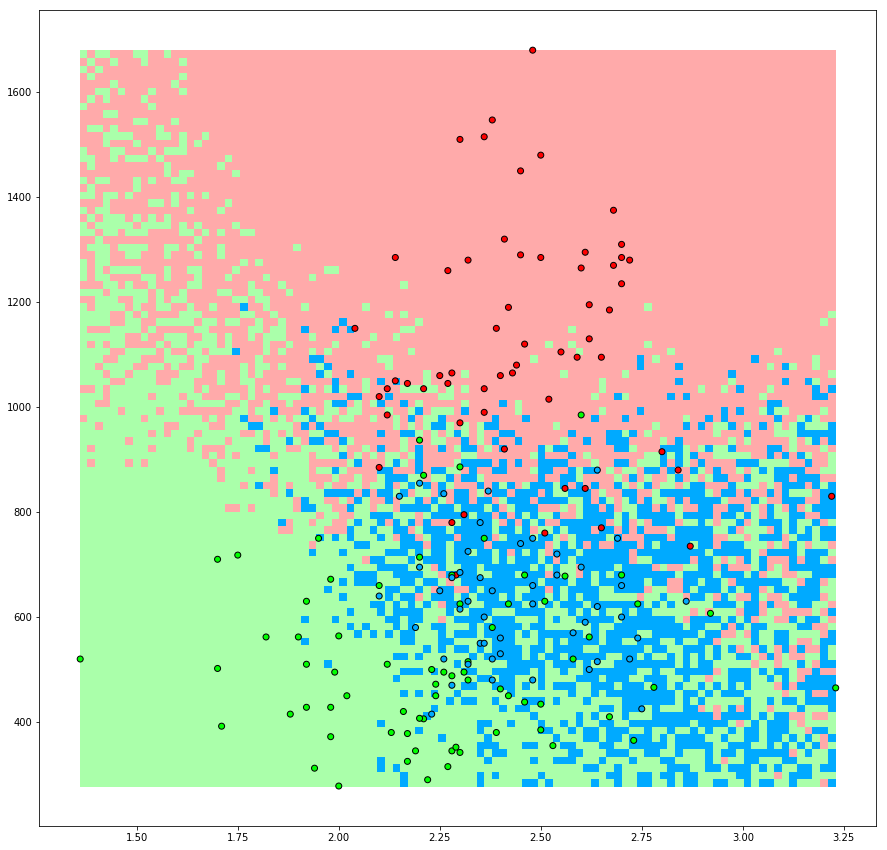

In [0]:
def visualize_soft_KNN(x0, x1, k):
  cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
  cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
  
  norm_x0 = normalize(x0)
  norm_x1 = normalize(x1)

  xx, yy = np.meshgrid(np.linspace(norm_x0.min(), norm_x0.max(), 100),
                       np.linspace(norm_x1.min(), norm_x1.max(), 100))

  norm_xx = xx.ravel()
  norm_yy = yy.ravel()
  

  yp = soft_KNN(np.c_[norm_xx, norm_yy], np.c_[norm_x0, norm_x1], k)

#   print(yp)  

  plt.subplots(figsize=(15,15))

  yp = yp.reshape(xx.shape)
  
  xx, yy = np.meshgrid(np.linspace(x0.min(), x0.max(), 100),
                       np.linspace(x1.min(), x1.max(), 100))

  plt.pcolormesh(xx, yy, yp, cmap=cmap_light)


  plt.scatter(x0, x1, c=Y, cmap=cmap_bold, edgecolor="k")
  plt.show()
  
  
visualize_soft_KNN(X[:, 2], X[:, 12], 15)

In [0]:
def visualize_prob_KNN(x0, x1, k):
  cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
  colors = ['#FFAAAA', '#AAFFAA','#00AAFF']
  
  norm_x0 = normalize(x0)
  norm_x1 = normalize(x1)

  xx, yy = np.meshgrid(np.linspace(norm_x0.min(), norm_x0.max(), 100),
                       np.linspace(norm_x1.min(), norm_x1.max(), 100))

  norm_xx = xx.ravel()
  norm_yy = yy.ravel()
  

  yp = prob_KNN(np.c_[norm_xx, norm_yy], np.c_[norm_x0, norm_x1], k)

#   print(yp) 

  plt.subplots(figsize=(15,15))

#   yp = yp.reshape(xx.shape)
  
#   xx, yy = np.meshgrid(np.linspace(x0.min(), x0.max(), 100),
#                        np.linspace(x1.min(), x1.max(), 100))
  
  cmap = [plt.get_cmap('Reds'), plt.get_cmap('Greens'), plt.get_cmap('Blues')]
  
  alpha = 0.2
  
  yp0 = yp[:, 0]
  
  xx0, yy0 = np.meshgrid(x0[yp0 > 0.5], x1[yp0 > 0.5])  
  
  yp0 = yp0[yp0>0.5]
  

  plt.pcolormesh(xx0, yy0, yp0.reshape(xx0.shape), cmap=cmap[0], alpha=alpha)
#   plt.pcolormesh(xx, yy, yp[:, 1].reshape(xx.shape), cmap=cmap[1], alpha=alpha)
#   plt.pcolormesh(xx, yy, yp[:, 2].reshape(xx.shape), cmap=cmap[2], alpha=alpha)


  plt.scatter(x0, x1, c=Y, cmap=cmap_bold, edgecolor="k")
  plt.show()
  
  
# visualize_prob_KNN(X[:, 2], X[:, 12], 15)

In [0]:
plt.scatter(X[:, 2], X[:, 12], c=Y, cmap=cmap_bold, edgecolor="k")
plt.show()

In [0]:
c=[{0: sdfas,
   1: freeedf,
   2: asdfjkas}[k] for k in Y]

## 2. Seleccionando la K usando Cross-Validation

Como hemos visto en la teoría, para seleccionar los valores del hiperparámetro K en el algoritmo de K-Nearest Neighbours, necesitamos realizar una división de nuestro conjunto de datos al igual que hacíamos previamente con el conjunto de *train* y *test*. Vamos a verlo:

---
**Tu tarea:** Utiliza la función KNN implementada por la librería Sklearn y analiza con todas las variables de entrada de nuestro dataset de vinos, cuál es el mejor valor a utilizar de *n_neighbors=*. Comienza reescalando las variables de entrada para conseguir un mejor análisis que no se vea afectado por las diferencias de rangos de valores de cada variable (¿Tendrá Sklearn alguna funcionalidad que haga esto?). Una vez tengas reescaladas las variables, vamos a entrenar y evaluar nuestro modelo.

1. Comienza realizando una partición de nuestros datos en train/test de 70%/30%.
2. Ahora vamos a comprobar cuál es el mejor valor que podemos asignar al hiperparámetro K. Probaremos con valores de K que itere de 1 a 100. Para cada una de las K, evaluaremos correctamente diviendo nuestro dataset de entrenamiento *train*, sobre el que realizaremos **10-Cross-validation**: es decir, entrenaremos 10 veces el modelo para cada valor de K, utilizando en cada caso una partición (***fold***) diferente para la validación. Con las 10 validaciones obtenidas para cada K, calcula la media, y reporta una gráfica donde en el eje X visualicemos cada valor de K y en el eje Y la evaluación (score()) media que hemos obtenido en cada caso.
3. Utiliza el valor de K que menos error ha generado en el punto 2, para entrenar nuevamente el modelo con dicho valor y evalúalo en el *test* set que hemos generado inicialmente.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

X = scale(X, with_mean=True, with_std=True)

x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.3)

def getBestK(X, KFoldSplits=10, k_number=100):

  score_means = []
  kf = KFold(n_splits=KFoldSplits)

  ks = np.arange(1, k_number + 1)

  for k in ks:
    scores = []
    for train_index, test_index in kf.split(x_train):
      model = KNeighborsClassifier(n_neighbors=k).fit(x_train[train_index],
                                                       y_train[train_index])
      scores.append(model.score(x_train[test_index], y_train[test_index]))
    score_means.append(np.mean(np.array(scores)))

  # print(score_means)
  plt.plot(ks, score_means)
  plt.show()
  return np.where(score_means == np.max(score_means))[0][0] + 1
  
bestK = getBestK(X)

model = KNeighborsClassifier(n_neighbors=bestK).fit(x_train, y_train)

print("El error del mejor modelo es", model.score(x_test, y_test), "con K =",
      bestK)